In [1]:
from pathlib import Path
root = Path("m:/projects/perfect_physics")

d:\OneDrive\Projects\Science\perfect-physics\perfect_physics\_misc.py:101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()

[-997/1001, -2999/1001]


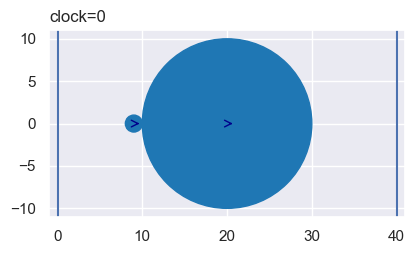

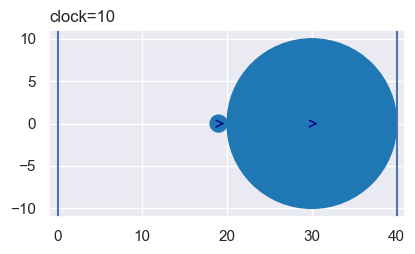

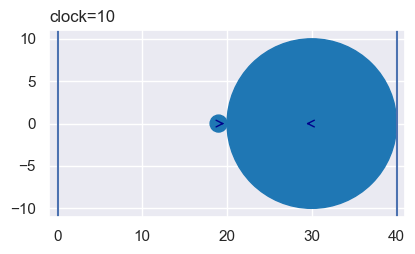

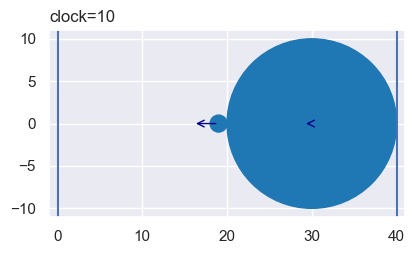

In [18]:
from perfect_physics import World, Circle, Wall

big_radius = 10
world_width = 40
folder = root / f"part1/two_size{big_radius}"

big = Circle(x=world_width // 2, y=0, r=big_radius, vx=1, vy=0, m=big_radius**3)
little = Circle(x=big.x - big_radius - 1, y=0, r=1, vx=1, vy=0, m=1)
circle_list = [big, little]
wall_list = [Wall(x0=0, y0=0, x1=0, y1=1), Wall(x0=world_width, y0=0, x1=world_width, y1=1)]
world = World(circle_list, wall_list, xlim=(-1, world_width + 1), ylim=(-big_radius - 1, big_radius + 1))
if True:
    world.run_in_place(2, show=True)
    print([circle.vx for circle in world.circle_list])
else:
    world.run_to_file(folder, 2000)
    World.render(folder, speed_up=10)

In [5]:
from sympy import limit, simplify, oo
from perfect_physics import load
cc_velocity_solution = load("data/cc_velocity_solution.sympy")
a_vx, a_vy, b_vx, b_vy  = cc_velocity_solution.subs([("a_x", 10), ("a_y", 0), ("a_r", 10), ("a_vx", -1), ("a_vy", 0),
                            ("b_x", -1), ("b_y", 0), ("b_r", 1), ("b_vx", 1), ("b_vy", 0), ("b_m", 1)])
print(simplify(b_vx))
limit(b_vx, "a_m", oo)
# prints (1 - 3*a_m)/(a_m + 1)
# returns -3

(1 - 3*a_m)/(a_m + 1)


-3

d:\OneDrive\Projects\Science\perfect-physics\perfect_physics\_misc.py:101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()

vx of tennis ball ~31.524302164947056
bounces per simulated time unit ~201.56086841418562
bounces per video second ~2015.6086841418562
bounces per video frame ~83.98369517257734
exact vx of tennis ball


32399008996745419519120899931238164304259324220373981464428082395874824001/1024278034668638942840780467754850654106564239817238638514628024276024001

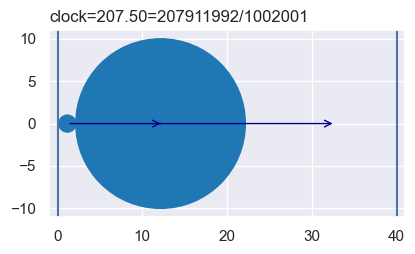

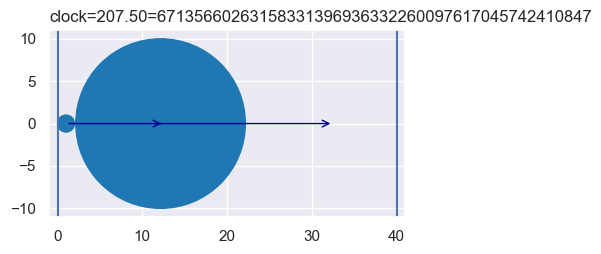

In [17]:

file = root / "part1/two_size10/run/worlds/01069.world_cp"
world = World.load(file)
world.show()
# print(world.circle_list)
t0 = world.clock
vx0 = world.circle_list[1].vx
# print(float(vx0))
world.tick_tock([],[])
world.tick_tock([],[])
world.show()
print(f"vx of tennis ball ~{float(world.circle_list[1].vx)}")
time_between_bounces = float(world.clock-t0)
print(f"bounces per simulated time unit ~{1.0/time_between_bounces}")
print(f"bounces per video second ~{10.0/time_between_bounces}")
print(f"bounces per video frame ~{10.0/(24.0*time_between_bounces)}")
print("exact vx of tennis ball")
vx0